In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
llaqo_df = pd.read_csv("checkpoint_51000.csv")
llaqo_df[-5:]

,Unnamed: 0,audio_path,question,output,gt,question_id,question_category,mae
61,61,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the correctness of the rhyt...,['4'],3,9,rhythm and tempo,1
62,62,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the consistency of the temp...,['4'],0,10,rhythm and tempo,4
63,63,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the connectivity of the lin...,['4'],3,11,articulation,1
64,64,/data/EECS-MachineListeningLab/datasets/LLaQo/...,"How would you rate the sense of tonality, on a...",['4'],2,12,tone production,2
65,65,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the naturalness of the dyna...,['4'],2,13,dynamics,2


In [3]:
ltu_df = pd.read_csv("ltu_results.csv")
ltu_df[-5:]

,audio_path,question,response,rating,gt,question_id,question_category,mae
61,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the correctness of the rhyt...,I would rate it as a 4. It is not perfect but ...,4,3,9,rhythm and tempo,1
62,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the consistency of the temp...,I would rate it as a 4. It is consistent but n...,4,0,10,rhythm and tempo,4
63,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the connectivity of the lin...,I would rate the connectivity of the lines as 3.,3,3,11,articulation,0
64,/data/EECS-MachineListeningLab/datasets/LLaQo/...,"How would you rate the sense of tonality, on a...",I would rate it as a 4. It has some clear tona...,4,2,12,tone production,2
65,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the naturalness of the dyna...,I would rate it as a 4. It is not completely n...,4,2,13,dynamics,2


In [19]:

def plot_by_qidx(df):
    # Assuming the DataFrame is named df
    # You might need to convert 'question_id' to a string if it's not already, for better plotting
    df['question_id'] = df['question_id'].astype(str)

    print(df['mae'].mean())

    # Setup the figure and axes
    fig, ax = plt.subplots(2, 1, figsize=(12, 12))  # 2 rows, 1 column

    # First plot: Mean Absolute Error by Question ID
    sns.barplot(ax=ax[0], x='question_id', y='mae', hue='question_id', data=df, estimator=np.average, palette='coolwarm')
    ax[0].set_title('Mean Absolute Error by Question ID')
    ax[0].set_xlabel('Question ID')
    ax[0].set_ylabel('Mean Absolute Error')
    ax[0].tick_params(axis='x', rotation=45)  # Rotate for better readability

    # Second plot: Mean Absolute Error by Question Category
    sns.barplot(ax=ax[1], x='question_category', y='mae',  hue='question_category', data=df, estimator=np.average, palette='viridis')
    ax[1].set_title('Mean Absolute Error by Question Category')
    ax[1].set_xlabel('Question Category')
    ax[1].set_ylabel('Mean Absolute Error')
    ax[1].tick_params(axis='x', rotation=45)  # Rotate for better readability

    plt.tight_layout()  # Adjust layout to not overlap
    plt.show()

1.803030303030303


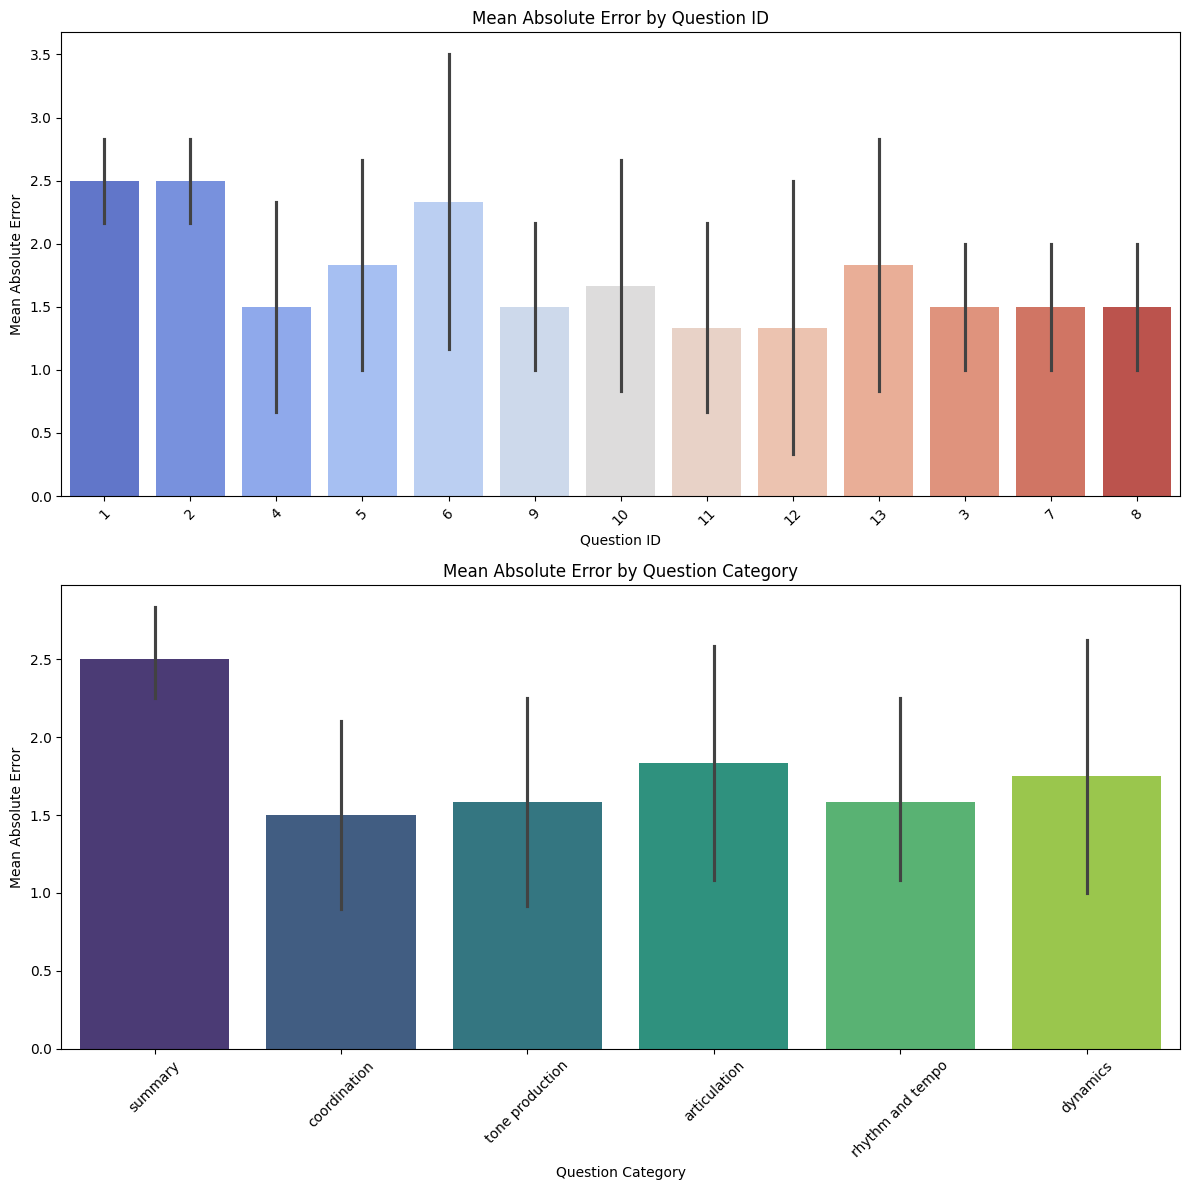

: 

In [20]:
plot_by_qidx(llaqo_df)

1.5303030303030303


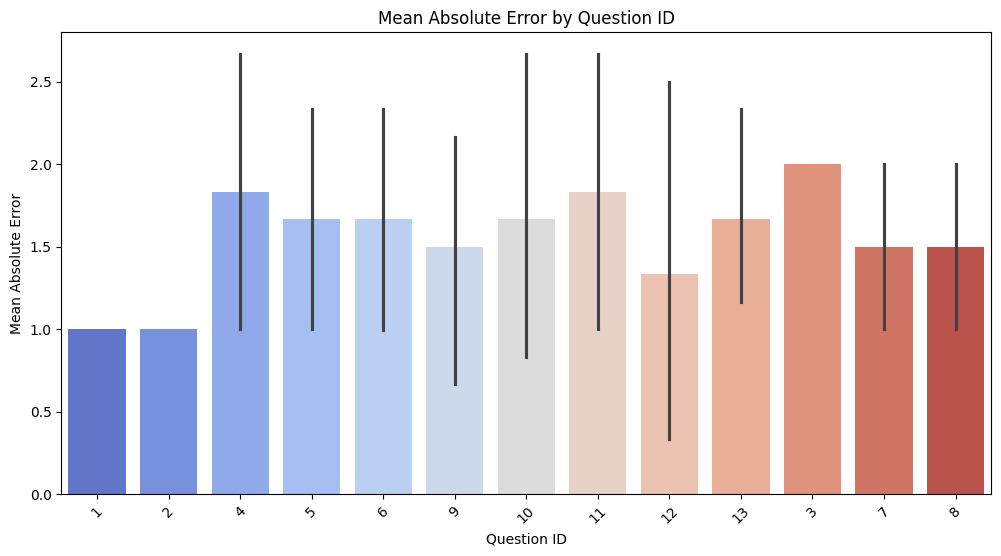

In [14]:
plot_by_qidx(ltu_df)

/tmp/ipykernel_51204/2271983407.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='question_category', y='mae', data=df, estimator=np.average, ci=None, palette='viridis')
/tmp/ipykernel_51204/2271983407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='question_category', y='mae', data=df, estimator=np.average, ci=None, palette='viridis')


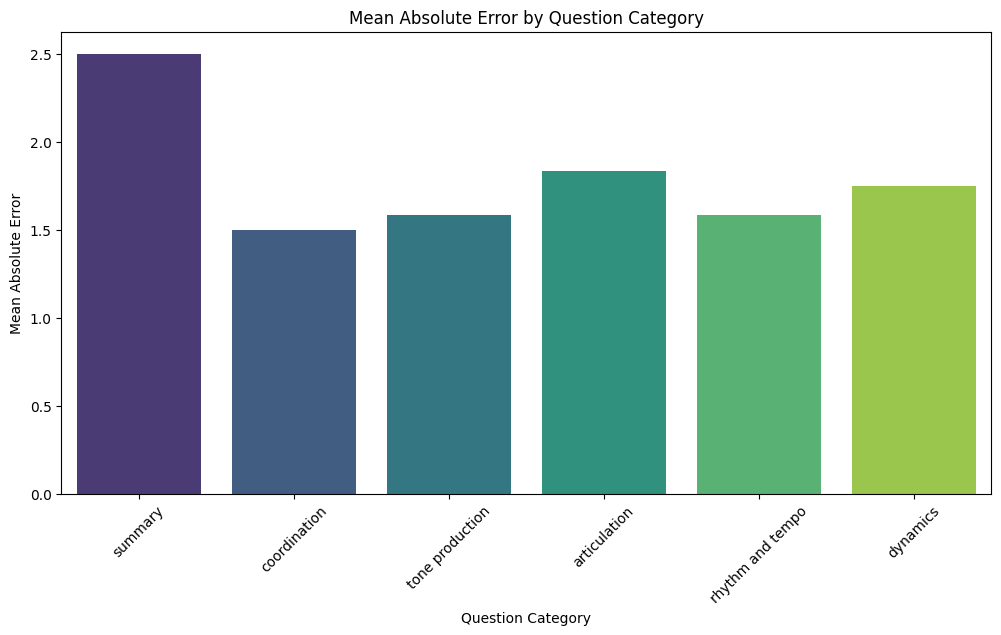

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='question_category', y='mae', data=df, estimator=np.average, ci=None, palette='viridis')
plt.title('Mean Absolute Error by Question Category')
plt.xlabel('Question Category')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)  # Rotate for better readability if needed
plt.show()